In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

BBECA = gpd.read_file('BB_Layers/ECOSYS_REV_TEM.shp')
BBECA = BBECA[['PRISTINE', 'ECO', 'MAP_UNIT', 'geometry']]

Towers = gpd.read_file('BB_Layers/Towers.shp')
Towers.loc[Towers['Name']=='Sapling_NoTreatment','Name']='BBS'

Burn = gpd.read_file('BB_Layers/SeedlingRemoval.shp')


In [2]:
BBECA['MAP_UNIT']

0      Pine Sphagnum Woodla
1      Pine Sphagnum Woodla
2              Birch Forest
3              Birch Forest
4      Mixed Conifer Forest
               ...         
323            Birch Forest
324    Pine Sphagnum Low Sh
325       Disturbed Surface
326    Mixed Conifer Forest
327        Cultivated Field
Name: MAP_UNIT, Length: 328, dtype: object

In [3]:
BBECA['AREA']=BBECA.area.values/1e6
Eco = BBECA[['MAP_UNIT','AREA']].groupby('MAP_UNIT').sum()
Eco['Pct']=Eco['AREA']/Eco['AREA'].sum()
Eco = Eco.sort_values(by='Pct')
print(Eco.index)
Eco

Index(['Water Lily - Watersh', 'Herb. veg on dist. p', 'Open Water',
       'Cultivated Field', 'Disturbed Surface', 'Hardhack Thicket',
       'Birch Forest', 'Mixed Conifer Forest', 'Pine-Salal Forest',
       'Pine Sphagnum Woodla', 'Beakrush - Three-way', 'Pine Sphagnum Tall S',
       'Beakrush - Sphagnum', 'Pine Sphagnum Low Sh'],
      dtype='object', name='MAP_UNIT')


,AREA,Pct
MAP_UNIT,,
Water Lily - Watersh,0.203007,0.006789
Herb. veg on dist. p,0.374083,0.012510
Open Water,0.602036,0.020133
Cultivated Field,0.799289,0.026730
Disturbed Surface,0.835726,0.027948
Hardhack Thicket,1.268282,0.042414
Birch Forest,1.352961,0.045246
Mixed Conifer Forest,1.362665,0.045570
Pine-Salal Forest,2.043343,0.068333


In [14]:
Classes = {
    'Water Lily - Watersh':'Water',
    'Herb. veg on dist. p':'Other',
    'Open Water':'Water',
    'Cultivated Field':'Other',
    'Disturbed Surface':'Other',
    'Hardhack Thicket':'Other',
    'Birch Forest':'Forested',
    'Mixed Conifer Forest':'Forested',
    'Pine-Salal Forest':'Forested',
    'Pine Sphagnum Woodla':'Forested Peatland',
    'Beakrush - Three-way':'Gramnoid Peatlant',
    'Pine Sphagnum Tall S':'Forested Peatland',
    'Beakrush - Sphagnum':'Gramnoid Peatlant',
    'Pine Sphagnum Low Sh':'Forested Peatland'
}

BBECA['Class'] = BBECA['MAP_UNIT']
BBECA['Class'] = BBECA['Class'].replace(Classes)

Class = BBECA[['Class','AREA']].groupby('Class').sum()

Class['Pct'] = Class['AREA']/Class['AREA'].sum()
Class.sort_values(by='Pct',ascending=False).round(2)

,AREA,Pct
Class,,
Forested Peatland,14.11,0.47
Gramnoid Peatlant,6.95,0.23
Forested,4.76,0.16
Other,3.28,0.11
Water,0.81,0.03


<Axes: >

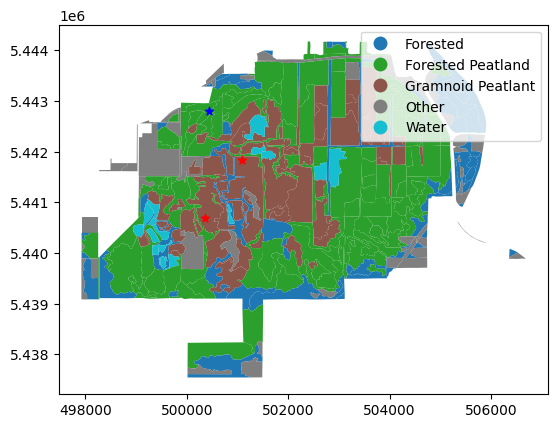

In [9]:


fig,ax = plt.subplots()

BBECA.plot(ax=ax,column='Class',legend=True)#,color='grey')
Towers.loc[Towers['Name']=='BBS'].plot(ax=ax,
  marker='*',color='b')#,s=50,label = 'Short-term EC Stations')
Towers.loc[Towers['Name']!='BBS'].plot(ax=ax,
  marker='*',color='r')#,s=50,label = 'Long-term EC Stations')



      ECO              MAP_UNIT
0    LS5M  Pine Sphagnum Woodla
1     LS5  Pine Sphagnum Woodla
2     BS4          Birch Forest
3     BS5          Birch Forest
4     RF5  Mixed Conifer Forest
..    ...                   ...
323   BS5          Birch Forest
324  LS3a  Pine Sphagnum Low Sh
325   NaN     Disturbed Surface
326   RK5  Mixed Conifer Forest
327  CF3a      Cultivated Field

[328 rows x 2 columns]


,FID_New_Sh,Id,FID_TEM,AREA,PERIMETER,TEM_,TEM_ID,POLYNO,SDEC_1,SITEMC_S1,...,TEMP,TEMP2,SPH_CAT,RARE_AVG,SHAPE_Leng,Relative_C,Shape_Le_1,Shape_Area,geometry,Area
0,0,0,1,36743.4,1132.020,0,0,325,0.0,LS,...,0.0,0.0,0.0,0.0,1132.014988,0.001229,1132.014988,36743.402725,"POLYGON ((502523.750 5443928.500, 502523.750 5...",36743.402725
1,0,0,2,144087.0,4012.370,0,0,2,6.0,LS,...,17.5,7.0,3.0,2.5,4012.374419,0.004819,4012.374419,144087.437250,"POLYGON ((504031.125 5443898.000, 503953.250 5...",144087.437250
2,0,0,3,13745.8,456.104,0,0,326,0.0,BS,...,0.5,0.5,1.0,2.5,456.104395,0.000460,456.104395,13745.801550,"POLYGON ((502866.062 5444164.500, 502871.469 5...",13745.801550
3,0,0,4,19291.2,737.207,0,0,324,0.0,BS,...,0.5,0.5,1.0,2.5,737.206913,0.000645,737.206913,19291.201825,"POLYGON ((503126.438 5444165.500, 503124.344 5...",19291.201825
4,0,0,5,237700.0,5060.100,0,0,4,0.0,RF,...,0.0,0.0,0.0,2.0,5060.104511,0.007949,5060.104511,237699.842875,"POLYGON ((505809.406 5442370.000, 505821.781 5...",237699.842875


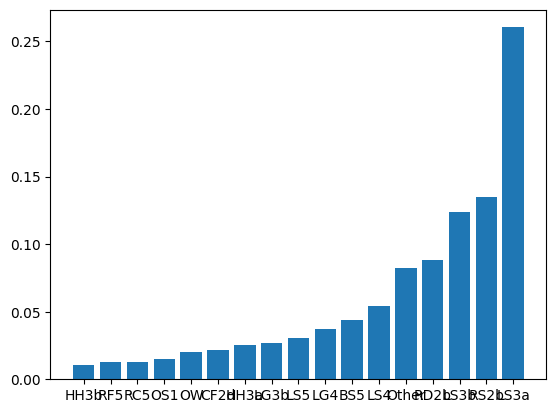

In [5]:

fig,ax = plt.subplots()
BBECA['Area'] = BBECA.area
Ecosystems = BBECA[['Area','ECO']].groupby('ECO').sum()

Ecosystems['Pct'] = Ecosystems['Area']/Ecosystems['Area'].sum()

Ecosystems['Type'] = Ecosystems.index
Ecosystems.loc[Ecosystems['Pct']<.01,'Type']='Other'

Ecosystems=Ecosystems.groupby('Type').sum()

Ecosystems = Ecosystems.sort_values(by='Pct')
ax.bar(Ecosystems.index,Ecosystems['Pct'])

print(BBECA[['ECO','MAP_UNIT']])